In [71]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.datasets import load_digits

### 1. Read the digits dataset https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [84]:
X,Y = load_digits(return_X_y=True)
data = load_digits()
DFdigits = pandas.DataFrame(data=data.data, columns=data.feature_names, index=data.target)
tdigits = np.array(list(DFdigits.index))

ncol = len(DFdigits.columns.values)
nrow = len(DFdigits.index.values)
print('ncol',ncol)
print('nrow',nrow)

DFdigits

ncol 64
nrow 1797


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


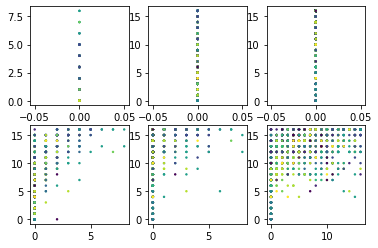

In [73]:
plt.figure()
plt.subplot(2,3,1)
plt.scatter(X[:,0], X[:,1], c=Y, s=2)
plt.subplot(2,3,2)
plt.scatter(X[:,0], X[:,2], c=Y, s=2)
plt.subplot(2,3,3)
plt.scatter(X[:,0], X[:,3], c=Y, s=2)
plt.subplot(2,3,4)
plt.scatter(X[:,1], X[:,2], c=Y, s=2)
plt.subplot(2,3,5)
plt.scatter(X[:,1], X[:,3], c=Y, s=2)
plt.subplot(2,3,6)
plt.scatter(X[:,2], X[:,3], c=Y, s=2)
plt.show()

#### Filtering

In [ ]:
#Filtering
ev = np.zeros((nrows,ncols))
ev[ dfscores.values[:,1]-1, dfscores.values[:,0]-1 ] = dfscores.values[:,2]

dfev = pandas.DataFrame(ev,index=nrows.values[:,1],columns=np.arange(ncols)+1)
dfev

### 2. Use PCA for reducing the dimensionality to 2 components
  - Print the digits map using the first two components. Add the explained variance to the axis.
  - Plot the explained variance ratio of the components. 

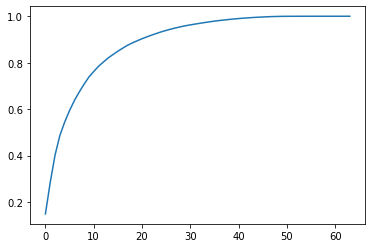

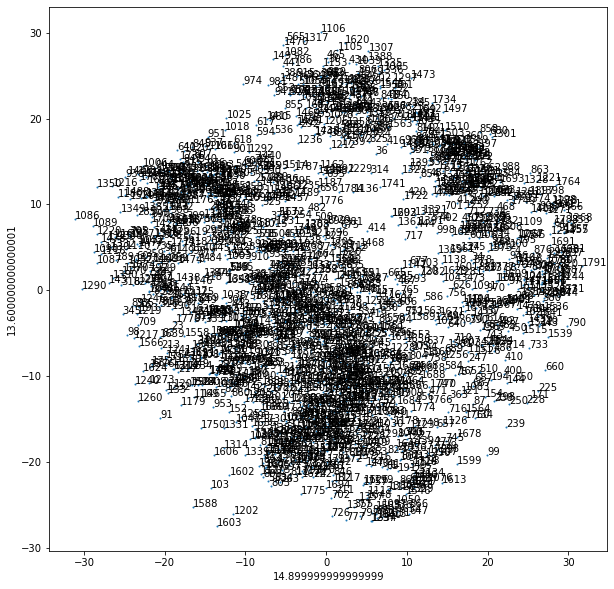

In [78]:
#Print the digits map using the first two components. Add the explained variance to the axis.
n = len(X)
#model = PCA(n_components=2)
model = PCA()
model.fit(X)
X2_pca = model.transform(X)
X2_pca = X2_pca[:,:2]

#Plot the explained variance ratio of the components.
exp_var = model.explained_variance_ratio_
#print(np.round(exp_var,3))
exp_var_acum = np.cumsum(exp_var)
plt.figure()
plt.plot(exp_var_acum)
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(X2_pca[:,0],X2_pca[:,1],s=1)
for i in range(n):
    plt.text(X2_pca[i,0], X2_pca[i,1], tdigits[i])
plt.xlabel(np.round(exp_var[0],3)*100)
plt.ylabel(np.round(exp_var[1],3)*100)
plt.show()


### 3. Use LDA for reducing the dimensionality to 2 components
   - Print the digits map using the first two components. 

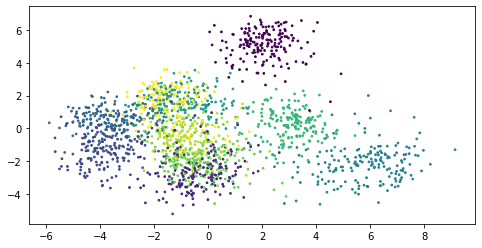

In [75]:
#modelLDA = LinearDiscriminantAnalysis(n_components=2)
modelLDA = LinearDiscriminantAnalysis()
X2LDA = modelLDA.fit_transform(X,Y)

plt.figure(figsize=(8,4))
plt.scatter(X2LDA[:,0],X2LDA[:,1], c=Y,s=3)
plt.show()

### 4. Use MDS for reducing the dimensionality to 2 components
   - Print the digits map

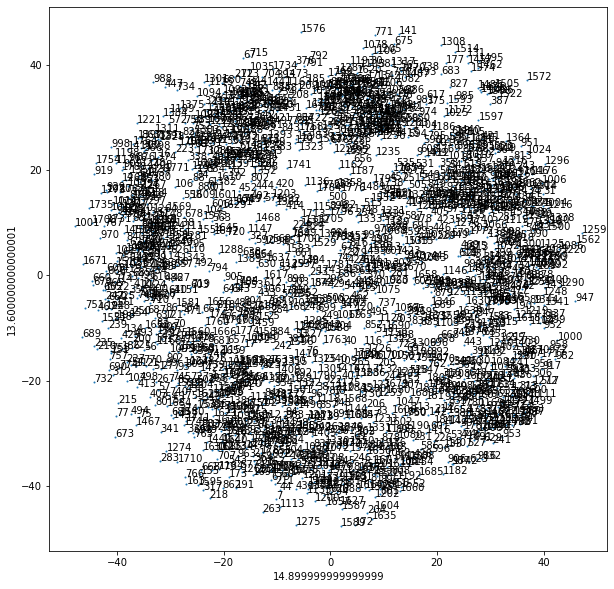

In [76]:
model = MDS(n_components=2)
X2_mds = model.fit_transform(X)

plt.figure(figsize=(10,10))
plt.scatter(X2_mds[:,0],X2_mds[:,1],s=1)
for i in range(n):
    plt.text(X2_mds[i,0], X2_mds[i,1], tdigits[i])
plt.xlabel(np.round(exp_var[0],3)*100)
plt.ylabel(np.round(exp_var[1],3)*100)
plt.show()